# Assignment Summary

<b>Dataset Description</b>: This is a transactional dataset that contains all the transactions occurring between 2010 and 2011.

<b>Goal</b>: To build predictive models to predict whether a customer will purchase again in the future.

<b>Business Opportunities</b>:
- Improve customer retention - target customers with personalised promotions
- Customer segmentation - solicit feedback from high-value customers

# 0. Imports

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/transactions/transactions.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/10 8:26,3.39,17850.0,United Kingdom


# 1. Exploratory Data Analysis

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/10 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.count()

Invoice        541910
StockCode      541910
Description    540456
Quantity       541910
InvoiceDate    541910
Price          541910
Customer ID    406830
Country        541910
dtype: int64

# 2. Data Pre-processing

## 2.1 Removing missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df = df.dropna(subset=['Customer ID'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      406830 non-null  object 
 1   StockCode    406830 non-null  object 
 2   Description  406830 non-null  object 
 3   Quantity     406830 non-null  int64  
 4   InvoiceDate  406830 non-null  object 
 5   Price        406830 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      406830 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


## 2.2 Removing cancelled transactions

In [10]:
# number of non-cancelled transactions
len(df[df['Invoice'].str.len() == 6])

397925

In [11]:
# number of cancelled transactions
len(df[df['Invoice'].str.len() == 7])

8905

In [12]:
df = df[~df['Invoice'].str.startswith('C')]

In [13]:
len(df)

397925

## 2.3 Segmenting the data into historical data and future data

Splitting the dataframe into two parts:
1. df_historical: transactions with invoiceDate earlier than 01
June 2011 and
2. df_future: transactions with invoiceDate on or later than 01 June 2011.

In [14]:
len(df)

397925

In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

/tmp/ipykernel_32/3633860036.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [16]:
cutoff_date = pd.to_datetime("2011-06-01", format='%Y-%m-%d')

In [17]:
df_historical = df[df['InvoiceDate'] < cutoff_date]
len(df_historical)

158684

In [18]:
df_future = df[df['InvoiceDate'] >= cutoff_date]
len(df_future)

239241

## 2.4 Creating the train data set

Create a new dataframe: df_train, which contains only one column: "Customer ID" from df_historical. Then create a new column "target" in df_train: target=1 if the customer had a purchase after or on 01 June 2011 and target=0 otherwise.

In [19]:
df_train = df_historical[["Customer ID"]].drop_duplicates().reset_index(drop=True)
df_train

,Customer ID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0
...,...
2862,12367.0
2863,13079.0
2864,14629.0
2865,15274.0


In [20]:
df_train["target"] = df_train['Customer ID'].isin(df_future['Customer ID']).astype(int)
df_train.head()

,Customer ID,target
0,17850.0,0
1,13047.0,1
2,12583.0,1
3,13748.0,1
4,15100.0,1


In [21]:
# checking the rersults
temp_df = df_future.groupby("Customer ID").count().reset_index()
temp_df

,Customer ID,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country
0,12347.0,100,100,100,100,100,100,100
1,12348.0,3,3,3,3,3,3,3
2,12349.0,73,73,73,73,73,73,73
3,12352.0,32,32,32,32,32,32,32
4,12355.0,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...
3492,18278.0,9,9,9,9,9,9,9
3493,18280.0,10,10,10,10,10,10,10
3494,18281.0,7,7,7,7,7,7,7
3495,18283.0,534,534,534,534,534,534,534


In [22]:
df_train[df_train["Customer ID"] == 12348.0] 

,Customer ID,target
812,12348.0,1


# 3. Feature Engineering

## 3.1 Total amount of historical transactions

In [23]:
df_historical.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [24]:
total_amount_df = df_historical.copy()
# multiply quantity by price
total_amount_df["Total Price"] = total_amount_df["Quantity"] * total_amount_df["Price"]
# groupby to get total amount per customer
total_amount_df = total_amount_df[["Customer ID", "Total Price"]].groupby("Customer ID").sum()["Total Price"].reset_index()

In [25]:
# merge with df_train
df_train = df_train.merge(total_amount_df, on="Customer ID")
df_train

,Customer ID,target,Total Price
0,17850.0,0,5391.21
1,13047.0,1,2119.61
2,12583.0,1,1277.82
3,13748.0,1,718.85
4,15100.0,1,700.80
...,...,...,...
2862,12367.0,0,168.90
2863,13079.0,1,30.00
2864,14629.0,1,354.18
2865,15274.0,1,332.58


## 3.2 Total number of historical transactions

In [26]:
total_transactions_df = df_historical.copy()
# assumption: each invoice only have 1 customer ID
total_transactions_df = total_transactions_df.drop_duplicates(subset='Invoice')
total_transactions_df = total_transactions_df[["Customer ID", "Invoice"]].groupby("Customer ID").count().reset_index()

In [27]:
# merge with df_train
df_train = df_train.merge(total_transactions_df, on="Customer ID").rename(columns={"Invoice": "Total Transactions"})
df_train

,Customer ID,target,Total Price,Total Transactions
0,17850.0,0,5391.21,34
1,13047.0,1,2119.61,7
2,12583.0,1,1277.82,2
3,13748.0,1,718.85,4
4,15100.0,1,700.80,2
...,...,...,...,...
2862,12367.0,0,168.90,1
2863,13079.0,1,30.00,1
2864,14629.0,1,354.18,1
2865,15274.0,1,332.58,1


## 3.3 Number of unique items from the historical transactions

In [28]:
unique_items_df = df_historical.groupby('Customer ID')['StockCode'].nunique().reset_index().rename(columns={"StockCode": "Unique Items"})
unique_items_df

,Customer ID,Unique Items
0,12346.0,1
1,12347.0,62
2,12348.0,22
3,12350.0,17
4,12352.0,40
...,...,...
2862,18272.0,22
2863,18273.0,1
2864,18282.0,12
2865,18283.0,126


In [29]:
# merge with df_train
df_train = df_train.merge(unique_items_df, on="Customer ID")
df_train

,Customer ID,target,Total Price,Total Transactions,Unique Items
0,17850.0,0,5391.21,34,21
1,13047.0,1,2119.61,7,72
2,12583.0,1,1277.82,2,38
3,13748.0,1,718.85,4,18
4,15100.0,1,700.80,2,1
...,...,...,...,...,...
2862,12367.0,0,168.90,1,11
2863,13079.0,1,30.00,1,1
2864,14629.0,1,354.18,1,66
2865,15274.0,1,332.58,1,22


## 3.4 Total number of items bought from the historical transactions

In [30]:
# total items bought historically
total_items_df = df_historical[["Customer ID", "Quantity"]].groupby("Customer ID").sum().reset_index().rename(columns={"Quantity": "Total Items"})
# merge with df_train
df_train = df_train.merge(total_items_df, on="Customer ID")
df_train

,Customer ID,target,Total Price,Total Transactions,Unique Items,Total Items
0,17850.0,0,5391.21,34,21,1733
1,13047.0,1,2119.61,7,72,990
2,12583.0,1,1277.82,2,38,755
3,13748.0,1,718.85,4,18,355
4,15100.0,1,700.80,2,1,64
...,...,...,...,...,...,...
2862,12367.0,0,168.90,1,11,173
2863,13079.0,1,30.00,1,1,24
2864,14629.0,1,354.18,1,66,165
2865,15274.0,1,332.58,1,22,242


## 3.5 Country of the customer

In [31]:
# country of customer -> if got 2, then take the last one
country_df = df_historical.sort_values(by='InvoiceDate')
country_df = country_df.groupby('Customer ID').tail(1)[["Customer ID", "Country"]]
# merge with df_train
df_train = df_train.merge(country_df, on="Customer ID")
df_train

,Customer ID,target,Total Price,Total Transactions,Unique Items,Total Items,Country
0,17850.0,0,5391.21,34,21,1733,United Kingdom
1,13047.0,1,2119.61,7,72,990,United Kingdom
2,12583.0,1,1277.82,2,38,755,France
3,13748.0,1,718.85,4,18,355,United Kingdom
4,15100.0,1,700.80,2,1,64,United Kingdom
...,...,...,...,...,...,...,...
2862,12367.0,0,168.90,1,11,173,Denmark
2863,13079.0,1,30.00,1,1,24,United Kingdom
2864,14629.0,1,354.18,1,66,165,United Kingdom
2865,15274.0,1,332.58,1,22,242,United Kingdom


## 3.6 Amount of last invoice

In [32]:
# amount of last invoice
last_invoice_amount_df = df_historical.sort_values(by='InvoiceDate')
last_invoice_amount_df["Lastest Total Price"] = last_invoice_amount_df["Quantity"] * last_invoice_amount_df["Price"]
last_invoice_amount_df = last_invoice_amount_df[["Invoice", "Customer ID", "Lastest Total Price"]].groupby(["Invoice", "Customer ID"]).sum().reset_index()
last_invoice_amount_df = last_invoice_amount_df[["Customer ID", "Lastest Total Price"]].groupby("Customer ID").tail(1)
# merge with df_train
df_train = df_train.merge(last_invoice_amount_df, on="Customer ID")
df_train

,Customer ID,target,Total Price,Total Transactions,Unique Items,Total Items,Country,Lastest Total Price
0,17850.0,0,5391.21,34,21,1733,United Kingdom,44.40
1,13047.0,1,2119.61,7,72,990,United Kingdom,447.93
2,12583.0,1,1277.82,2,38,755,France,421.96
3,13748.0,1,718.85,4,18,355,United Kingdom,31.60
4,15100.0,1,700.80,2,1,64,United Kingdom,350.40
...,...,...,...,...,...,...,...,...
2862,12367.0,0,168.90,1,11,173,Denmark,168.90
2863,13079.0,1,30.00,1,1,24,United Kingdom,30.00
2864,14629.0,1,354.18,1,66,165,United Kingdom,354.18
2865,15274.0,1,332.58,1,22,242,United Kingdom,332.58


## 3.7 Number of items bought in the last invoice

In [33]:
# items bought last invoice
last_invoice_quantity_df = df_historical.sort_values(by='InvoiceDate')
last_invoice_quantity_df = last_invoice_quantity_df[["Invoice", "Customer ID", "Quantity"]].groupby(["Invoice", "Customer ID"]).sum().reset_index()
last_invoice_quantity_df = last_invoice_quantity_df[["Customer ID", "Quantity"]].groupby("Customer ID").tail(1)
# merge with df_train
df_train = df_train.merge(last_invoice_quantity_df, on="Customer ID")
df_train

,Customer ID,target,Total Price,Total Transactions,Unique Items,Total Items,Country,Lastest Total Price,Quantity
0,17850.0,0,5391.21,34,21,1733,United Kingdom,44.40,24
1,13047.0,1,2119.61,7,72,990,United Kingdom,447.93,309
2,12583.0,1,1277.82,2,38,755,France,421.96,306
3,13748.0,1,718.85,4,18,355,United Kingdom,31.60,8
4,15100.0,1,700.80,2,1,64,United Kingdom,350.40,32
...,...,...,...,...,...,...,...,...,...
2862,12367.0,0,168.90,1,11,173,Denmark,168.90,173
2863,13079.0,1,30.00,1,1,24,United Kingdom,30.00,24
2864,14629.0,1,354.18,1,66,165,United Kingdom,354.18,165
2865,15274.0,1,332.58,1,22,242,United Kingdom,332.58,242


## 3.8 Pre-processing before Model Training

In [34]:
# data pre-processing: one-hot encoding on Country
df_train = pd.get_dummies(df_train, columns=['Country'], drop_first=True, dtype=int)

df_train

,Customer ID,target,Total Price,Total Transactions,Unique Items,Total Items,Lastest Total Price,Quantity,Country_Austria,Country_Bahrain,...,Country_Poland,Country_Portugal,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom
0,17850.0,0,5391.21,34,21,1733,44.40,24,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13047.0,1,2119.61,7,72,990,447.93,309,0,0,...,0,0,0,0,0,0,0,0,0,1
2,12583.0,1,1277.82,2,38,755,421.96,306,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13748.0,1,718.85,4,18,355,31.60,8,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15100.0,1,700.80,2,1,64,350.40,32,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,12367.0,0,168.90,1,11,173,168.90,173,0,0,...,0,0,0,0,0,0,0,0,0,0
2863,13079.0,1,30.00,1,1,24,30.00,24,0,0,...,0,0,0,0,0,0,0,0,0,1
2864,14629.0,1,354.18,1,66,165,354.18,165,0,0,...,0,0,0,0,0,0,0,0,0,1
2865,15274.0,1,332.58,1,22,242,332.58,242,0,0,...,0,0,0,0,0,0,0,0,0,1


# 4. Model Training

Split df_train into train and test and set test_size=0.2 and random_state=2024

In [35]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_train, test_size=0.2, random_state=2024)

In [36]:
train_set.shape

(2293, 41)

In [37]:
test_set.shape

(574, 41)

Training the following models
- LogisticRegression
- RandomForest
- GradientBoost

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train = train_set.drop(columns='target')
y_train = train_set['target']
X_test = test_set.drop(columns='target')
y_test = test_set['target']

In [39]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

lr = LogisticRegression()
rf = RandomForestClassifier(random_state=2024)
xgb = XGBClassifier(random_state=2024)

rf_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
xgb_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=2)

In [40]:
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2024),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [42]:
xgb_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=20, mi

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=2024, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [43]:
print("Best parameters for RandomForest:", rf_search.best_params_)
print("Best parameters for XGBoost:", xgb_search.best_params_)

rf_best = rf_search.best_estimator_
xgb_best = xgb_search.best_estimator_

lr_pred = lr.predict(X_test)
rf_pred = rf_best.predict(X_test)
xgb_pred = xgb_best.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)
rf_acc = accuracy_score(y_test, rf_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)

print()
print(f"LogisticRegression Accuracy: {lr_acc}")
print(f"RandomForest Accuracy: {rf_acc}")
print(f"XGBoost Accuracy: {xgb_acc}")

Best parameters for RandomForest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for XGBoost: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}

LogisticRegression Accuracy: 0.7299651567944251
RandomForest Accuracy: 0.7299651567944251
XGBoost Accuracy: 0.7299651567944251


# 5. Model Evaluation

## 5.1 Evaluation Scores

Report the model performance in terms of precision, recall, F1, and ROC_AUC on the train and
test sets for the individual classifiers and the meta classifier. (2 points)

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def print_metrics(model, X_train, y_train, X_test, y_test, name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_prob = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    train_roc_auc = roc_auc_score(y_train, y_train_prob) if y_train_prob is not None else None
    test_roc_auc = roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else None
    
    print(f"{name} Performance:")
    print(f"Train Precision: {train_precision}")
    print(f"Test Precision: {test_precision}")
    print(f"Train Recall: {train_recall}")
    print(f"Test Recall: {test_recall}")
    print(f"Train F1: {train_f1}")
    print(f"Test F1: {test_f1}")
    print(f"Train ROC AUC: {train_roc_auc}")
    print(f"Test ROC AUC: {test_roc_auc}")
    print("\n")

print_metrics(lr, X_train, y_train, X_test, y_test, "LogisticRegression")
print_metrics(rf_best, X_train, y_train, X_test, y_test, "RandomForest")
print_metrics(xgb_best, X_train, y_train, X_test, y_test, "XGBoost")

LogisticRegression Performance:
Train Precision: 0.7006980802792321
Test Precision: 0.7299651567944251
Train Recall: 1.0
Test Recall: 1.0
Train F1: 0.8240123140071831
Test F1: 0.8439073514602216
Train ROC AUC: 0.7019265454690471
Test ROC AUC: 0.7016860420355686


RandomForest Performance:
Train Precision: 0.7138406764574989
Test Precision: 0.7323943661971831
Train Recall: 0.9987546699875467
Test Recall: 0.9928400954653938
Train F1: 0.8325979756034259
Test F1: 0.8429584599797365
Train ROC AUC: 0.8380599679875865
Test ROC AUC: 0.7008391716067441


XGBoost Performance:
Train Precision: 0.7003924989097252
Test Precision: 0.7299651567944251
Train Recall: 1.0
Test Recall: 1.0
Train F1: 0.823800974608874
Test F1: 0.8439073514602216
Train ROC AUC: 0.7433641312327681
Test ROC AUC: 0.7171144814843328




## 5.2 AUC-ROC Curve

Plot the ROC curve of all the above models based on the evaluation of the test set. (3 points)

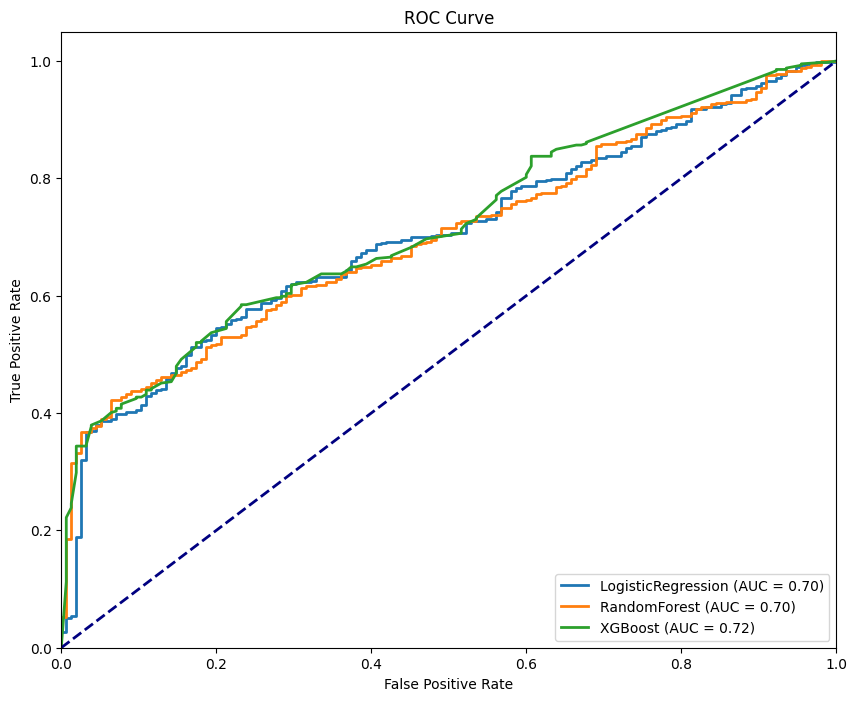

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    for name, model in models:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_prob = model.decision_function(X_test)
        
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

base_classifiers = [
    ('LogisticRegression', lr),
    ('RandomForest', rf_best),
    ('XGBoost', xgb_best)
]

plot_roc_curve(base_classifiers, X_test, y_test)